In [153]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import optimize
import math

In [192]:
#Loading data
data_1 = np.loadtxt("Data\\twenty-deg.txt")
data_2 = np.loadtxt("Data\\one-hundred-ten-deg.txt")

In [193]:
data_1

array([[  0. ,  25.1],
       [  5. ,  20.7],
       [ 10. ,  15.9],
       [ 15. ,  14.3],
       [ 20. ,  14.5],
       [ 25. ,  18.7],
       [ 30. ,  23.2],
       [ 35. ,  30.4],
       [ 40. ,  37.6],
       [ 45. ,  44.6],
       [ 50. ,  51.3],
       [ 55. ,  55.5],
       [ 60. ,  59.4],
       [ 65. ,  56.7],
       [ 70. ,  53.2],
       [ 75. ,  47.4],
       [ 80. ,  43.6],
       [ 85. ,  35.3],
       [ 90. ,  27.6],
       [ 95. ,  21.1],
       [100. ,  16.4],
       [105. ,  14.4],
       [110. ,  14.6],
       [115. ,  17.8],
       [120. ,  23.8],
       [125. ,  30.4],
       [130. ,  38.4],
       [135. ,  45.7],
       [140. ,  52.7],
       [145. ,  59.1],
       [150. ,  61.3],
       [155. ,  58.4],
       [160. ,  55.4],
       [165. ,  50.7],
       [170. ,  43.8],
       [175. ,  36.2],
       [180. ,  27.6],
       [185. ,  21. ],
       [190. ,  16.3],
       [195. ,  14.2],
       [200. ,  14.9],
       [205. ,  18.9],
       [210. ,  24.5],
       [215

In [194]:
data_2

array([[  0. ,  38.3],
       [  5. ,  42.5],
       [ 10. ,  46.4],
       [ 15. ,  48. ],
       [ 20. ,  48.5],
       [ 25. ,  46.1],
       [ 30. ,  42.4],
       [ 35. ,  37.2],
       [ 40. ,  32.2],
       [ 45. ,  26.3],
       [ 50. ,  21.2],
       [ 55. ,  17.8],
       [ 60. ,  15.6],
       [ 65. ,  15.8],
       [ 70. ,  17.6],
       [ 75. ,  21.4],
       [ 80. ,  26.8],
       [ 85. ,  32.2],
       [ 90. ,  38.6],
       [ 95. ,  44.3],
       [100. ,  47.1],
       [105. ,  49.2],
       [110. ,  48.7],
       [115. ,  46.6],
       [120. ,  42.7],
       [125. ,  37.8],
       [130. ,  32.6],
       [135. ,  26.2],
       [140. ,  21.3],
       [145. ,  17.6],
       [150. ,  15.7],
       [155. ,  15.7],
       [160. ,  17.8],
       [165. ,  21.6],
       [170. ,  27.6],
       [175. ,  33.7],
       [180. ,  39.4],
       [185. ,  45.1],
       [190. ,  48.9],
       [195. ,  50.7],
       [200. ,  50.6],
       [205. ,  47.9],
       [210. ,  43.9],
       [215

<Figure size 432x432 with 0 Axes>

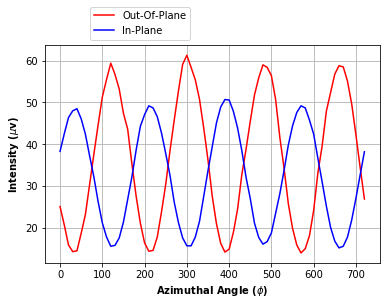

<Figure size 432x432 with 0 Axes>

In [155]:
#Splicing, calibrating, and plotting data

#Half-wave plate rotates light by twice the rotation angle of the plate
def calibrate(data):
    data = 2*data
    return data

#Out-of-plane
data_1_x = data_1[:,0]
data_1_x_calibrated = calibrate(data_1_x)
data_1_y = data_1[:,1]

#In-plane
data_2_x = data_2[:,0]
data_2_x_calibrated = calibrate(data_2_x)
data_2_y = data_2[:,1]

#Plotting both curves
plot_1 = plt.plot(data_1_x_calibrated, data_1_y, "r", label = "Out-Of-Plane")
plot_2 = plt.plot(data_2_x_calibrated, data_2_y, "b", label= "In-Plane")
plt.grid()
plt.xlabel("Azimuthal Angle ($\phi$)", fontweight="bold")
plt.ylabel("Intensity ($\mu$v)", fontweight="bold")
plt.legend(bbox_to_anchor=(0.45, 1.2))
figure(figsize=(6,6))

We are fitting both curves to the function $$I=a\cos^2(\phi+\phi')+b$$ to exctract the phase shifts $\phi'$ and a systematic way measuring amplitude ratios via the $a$ parameter.

In [185]:
#Defining fit function
def fit(x, a, b, phi, c):
    return (a*math.cos(b*x+phi)**2)+c

#Vectorizing fit function to accept list input
fit_v = np.vectorize(fit)

In [189]:
#Perfoming the fit on each set of data
params1, covs1 = optimize.curve_fit(fit_v, data_1_x_calibrated, data_1_y, p0=[20,1,90,1])
params2, covs2 = optimize.curve_fit(fit_v, data_2_x_calibrated, data_2_y, p0=[30,1,90,1])

In [190]:
#Displaying Fit Parameters
print("Out-Of-Plane Params: ", "\n", "a = ", params1[0], "b = ", params1[1], "phi = ", params1[2], "c = ", params1[3])
print("In-Plane Params: ", "\n", "a = ", params2[0], "b = ", params2[1], "phi = ", params2[2], "c = ", params2[3])

Out-Of-Plane Params:  
 a =  0.5672667739058921 b =  0.9993933824474126 phi =  89.90887521641335 c =  36.238511047160046
In-Plane Params:  
 a =  0.7829134673030625 b =  1.001042863849677 phi =  90.02577343589579 c =  32.16678809801735


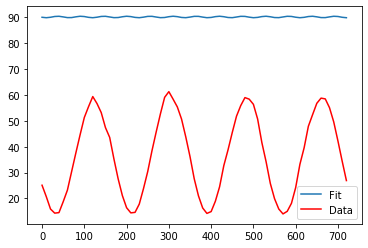

In [188]:
#Plotting Fit 1
fit_1_y_data = []
for i in range(len(data_1_x)):
    fit_1_y_data.append(params1[0]*math.cos(data_1_x_calibrated[i]+params1[1])**2+params1[2])
plt.plot(data_1_x_calibrated, fit_1_y_data, label="Fit")
plt.plot(data_1_x_calibrated, data_1_y, "r", label = "Data")
plt.legend()

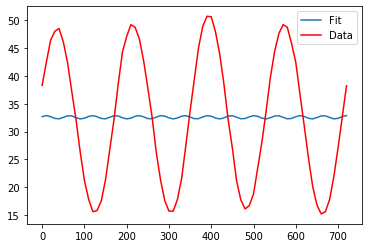

In [171]:
#Plotting Fit 2
fit_2_y_data = []
for i in range(len(data_1_x)):
    fit_2_y_data.append(params2[0]*math.cos(data_2_x_calibrated[i]+params2[1])**2+params2[2])
plt.plot(data_2_x_calibrated, fit_2_y_data, label="Fit")
plt.plot(data_2_x_calibrated, data_2_y, "r", label="Data")
plt.legend()

The standard error of a fit paramter can be extracted from the covariance matrix returned by the optimize.curve_fit by performing the following on the diagonal elements

$$ E = \frac{\sqrt{Cov(x)}}{n}$$
Where $n$ is the number of sample points.

In [161]:
#Function To Return Errors In Fit Parameters
def error(covs):
    errors = []
    for i in range(len(covs)):
        errors.append(math.sqrt((abs(covs[i][i])))/len(data_1_x_calibrated))
    return errors

In [162]:
#Finding Errors Of Fit Parameters
errors1 = error(covs1)
errors2 = error(covs2)

In [163]:
#Displaying Standard Error Of Fit Parameters
print("Out-Of-Plane Errors: ", "\n", "a = ", errors1[0], "phi = ", errors1[1], "b = ", errors1[2])
print("In-Plane Errors: ", "\n", "a = ", errors2[0], "phi = ", errors2[1], "b = ", errors2[2])

Out-Of-Plane Errors:  
 a =  0.0730413903516542 phi =  0.045470904257514766 b =  0.05462993165678139
In-Plane Errors:  
 a =  0.05525062700830568 phi =  0.03429877549430071 b =  0.04654529095991881
